### Gradient descent Implementation

In [29]:
## Importing the dataset
import pandas as pd
housing = pd.read_csv('Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [30]:
## Converting Yes to 1 and No to 0
cat_cols = housing.select_dtypes(include=['O']).columns
cat_cols = [i for i in cat_cols if i!='furnishingstatus']
for i in cat_cols:
    housing[i] = housing[i].map({'yes':1,'no':0})

In [31]:
## Converting furnishingstatus column to binary column using get_dummies
status = pd.get_dummies(housing['furnishingstatus'],drop_first=True)
housing = pd.concat([housing,status],axis=1)

In [32]:
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,0,0


In [34]:
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [35]:
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [41]:
## Normalizing the dataset
housing = (housing - housing.mean())/housing.std()
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,-0.844113,-0.69579
1,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,-0.844113,-0.69579
2,4.000809,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284,1.182502,-0.69579
3,3.982096,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284,-0.844113,-0.69579
4,3.551716,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526,-0.844113,-0.69579


In [40]:
## alternative method
from sklearn.preprocessing import StandardScaler
StandardScaler().fit_transform(housing)

array([[ 4.56636513,  1.04672629,  1.40341936, ...,  1.80494113,
        -0.84488844, -0.6964292 ],
       [ 4.00448405,  1.75700953,  1.40341936, ..., -0.55403469,
        -0.84488844, -0.6964292 ],
       [ 4.00448405,  2.21823241,  0.04727831, ...,  1.80494113,
         1.18358821, -0.6964292 ],
       ...,
       [-1.61432675, -0.70592066, -1.30886273, ..., -0.55403469,
        -0.84488844,  1.43589615],
       [-1.61432675, -1.03338891,  0.04727831, ..., -0.55403469,
        -0.84488844, -0.6964292 ],
       [-1.61432675, -0.5998394 ,  0.04727831, ..., -0.55403469,
        -0.84488844,  1.43589615]])

In [42]:
### assing feature variable X
X = housing['area']
y = housing['price']

In [43]:
import seaborn as sns
%matplotlib inline

C:\Users\Prince\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


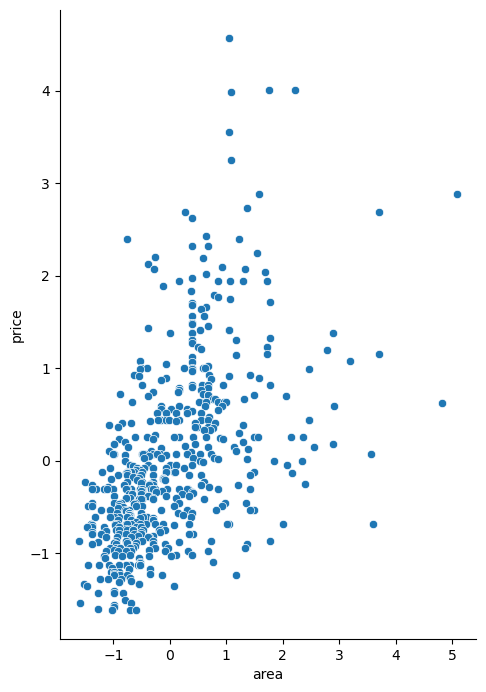

In [44]:
## visualise the relationship
sns.pairplot(housing,x_vars='area',y_vars ='price',size=7,aspect=0.7,kind='scatter')

In [45]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [50]:
## Implementing gradient_descent
def gradient(X,y,m_current=0,c_current=0,iters=1000,learning_rate=0.01):
    N = float(len(y))
    gd_df = pd.DataFrame(columns=['m_current','c_current','cost'])
    for i in range(iters):
        y_current= (m_current*X)+c_current
        cost = sum([data**2 for data in (y-y_current)])/N
        m_gradient = -(2/N)*sum(X*(y-y_current))
        c_gradient = -(2/N)*sum(y-y_current)
        m_current = m_current-(learning_rate*m_gradient)
        c_current = c_current - (learning_rate*c_gradient)
        gd_df.loc[i] = [m_current,c_current,cost]
    return(gd_df)

In [51]:
gradients = gradient(X,y)
gradients

,m_current,c_current,cost
0,0.010700,5.117211e-18,0.998165
1,0.021187,2.230224e-17,0.986830
2,0.031464,3.243888e-17,0.975943
3,0.041536,3.045067e-17,0.965486
4,0.051407,2.675943e-17,0.955442
...,...,...,...
995,0.535997,2.630312e-16,0.711399
996,0.535997,2.560398e-16,0.711399
997,0.535997,2.557220e-16,0.711399
998,0.535997,2.522997e-16,0.711399


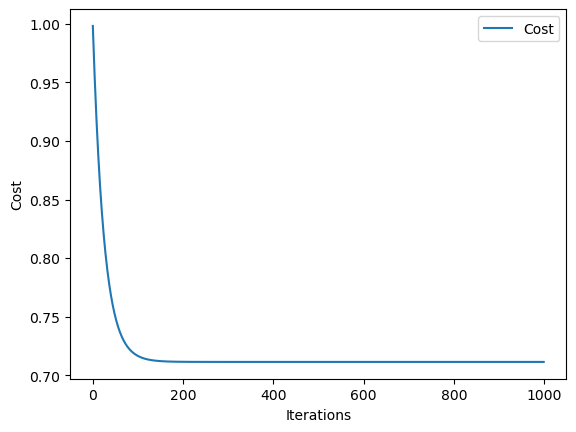

In [57]:
## Plotting the graph
import matplotlib.pyplot as plt
plt.plot(gradients.index,gradients['cost'],label = 'Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()

- Here we can clearly see that the cost becomes saturated after 150 iterations.

### Gradient descent for MultiLinear Regression

In [58]:
X = housing
y = housing['price']

In [60]:
## computing the cost
def compute_cost(X,y,theta):
    return np.sum(np.square(np.matmul(X,theta)-y))/ (2 * len(y))

In [61]:
def gradient_descent_multi(X, y, theta, alpha, iterations):    
    theta = np.zeros(X.shape[1])    
    m = len(X)    
    gdm_df = pd.DataFrame( columns = ['Bets','cost'])    
    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta) 
        gdm_df.loc[i] = [theta,cost]    
    return gdm_df

In [63]:
gradient = gradient_descent_multi(X,y,theta=0,alpha=0.01,iterations=1000)
gradient

,Bets,cost
0,price 0.009982 area ...,0.473502
1,price 0.019703 area ...,0.449486
2,price 0.029173 area ...,0.426937
3,price 0.038400 area ...,0.405764
4,price 0.047389 area ...,0.385880
...,...,...
995,price 0.931151 area ...,0.000796
996,price 0.931310 area ...,0.000793
997,price 0.931469 area ...,0.000789
998,price 0.931628 area ...,0.000785


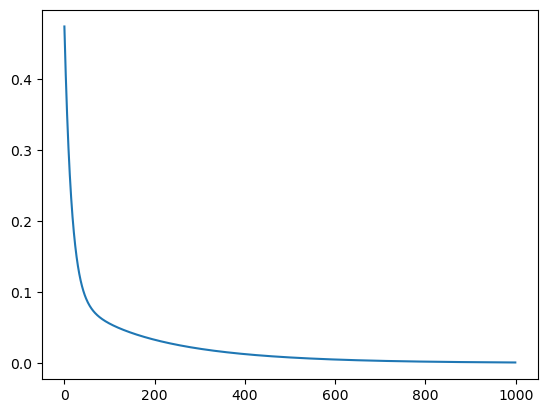

In [64]:
## Plotting a graph
plt.plot(gradient.index,gradient['cost'])
plt.show()

- As per the observation the graph comes to saturation on about 400 iterations.